In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

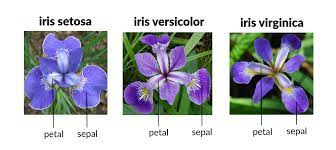

### Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/Administrator/Downloads/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

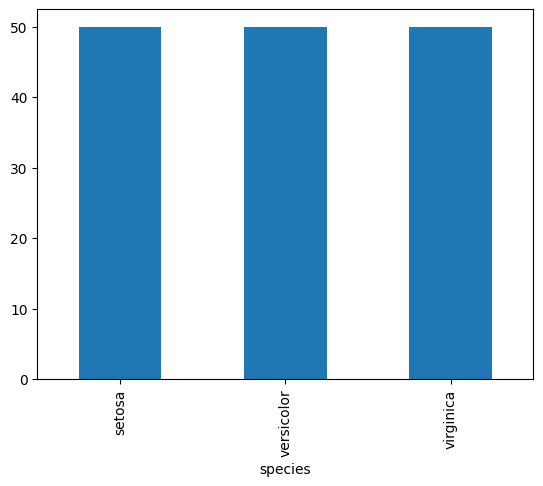

In [7]:
df['species'].value_counts().plot(kind='bar')

### Seperate X, Y

In [8]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Apply Label Encoding on Y feature

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species']= le.fit_transform(Y['species'])

In [12]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

In [13]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Save the label encoder as pickle file

In [14]:
import pickle
with open('LabelEnc.pkl','wb') as file1:
    pickle.dump(le,file1)

### Preprocessing of X

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pre = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [16]:
X.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

### Save the scaler in pkl format

In [17]:
with open('Scaler.pkl','wb') as file2:
    pickle.dump(scaler, file2)

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y, test_size=0.33, random_state=42)

In [19]:
xtrain.shape

(100, 4)

In [20]:
xtest.shape

(50, 4)

### Create the model

In [21]:
params = {'n_neighbors':[2,3,4,5,6,7,8]}

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knc = KNeighborsClassifier()
gscv = GridSearchCV(knc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]},
             scoring='f1_macro')

In [23]:
gscv.best_params_

{'n_neighbors': 3}

In [24]:
gscv.best_score_

0.9319552669552669

In [25]:
best_knn = gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

### Save the model file in pkl format

In [26]:
with open('best_knn.pkl','wb') as file3:
    pickle.dump(best_knn,file3)

### Evaluate the model

In [27]:
best_knn.score(xtrain,ytrain)

0.95

In [28]:
best_knn.score(xtest,ytest)

0.98

### Plot confusion matrix

In [29]:
ypred_tr = best_knn.predict(xtrain)
ypred_ts = best_knn.predict(xtest)

In [30]:
ypred_ts[0:5]

array([1, 0, 2, 1, 1])

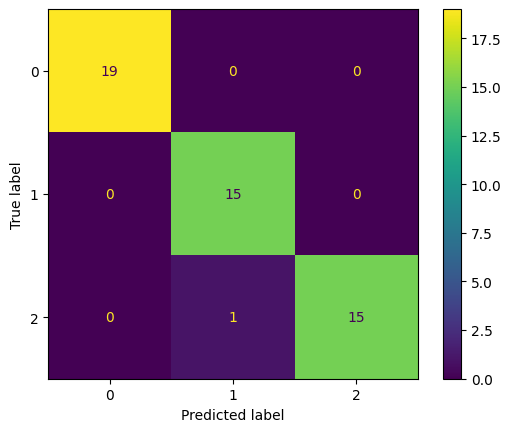

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_knn.classes_)
cfd.plot()

### Classification Report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Getting orignal labels

In [33]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [34]:
ypred_tr_lb

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicol

In [35]:
ypred_ts_lb

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [36]:
best_knn.predict_proba(xtest)

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

### Predicting new datapoints

In [37]:
def predict_data():
    sep_len = float(input('Please Enter Sepal Length : '))
    sep_wid = float(input('Please Enter Sepal Width : '))
    pet_len = float(input('Please Enter Petal Length : '))
    pet_wid = float(input('Please Enter Petal Width : '))

    xnew = pd.DataFrame([sep_len, sep_wid, pet_len, pet_wid]).T
    xnew.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    print('Dataframe before preprocessing :\n')
    display(xnew)

    xnew_pre = pd.DataFrame(scaler.transform(xnew),columns=xnew.columns)
    print(f'DataFrame after Preprocessing :\n')
    display(xnew_pre)
    
    pred = best_knn.predict(xnew_pre)
    pred_lb = le.inverse_transform(pred)[0]

    prob = best_knn.predict_proba(xnew_pre).max()

    print(f'Predicted Species : {pred_lb}')
    print(f'Probability : {prob}')

In [39]:
predict_data

<function __main__.predict_data()>

In [40]:
predict_data()

Dataframe before preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.4,1.4,0.3


DataFrame after Preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,-1.506521,0.788808,-1.340227,-1.183812


Predicted Species : setosa
Probability : 1.0


In [41]:
predict_data()

Dataframe before preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,6.5,3.0,5.5,1.8


DataFrame after Preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,0.795669,-0.131979,0.990108,0.790671


Predicted Species : virginica
Probability : 1.0
